<a href="https://colab.research.google.com/github/sohomghosh/Data_Visualization_FDP/blob/main/DataVisualization_XIMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
Link to download the dataset: https://www.kaggle.com/burak3ergun/loan-data-set/version/1

# Notebook
This notebook is available for download at https://github.com/sohomghosh/Data_Visualization_FDP

# Documentations

**Matplotlib:**

*   https://matplotlib.org/stable/contents.html#
*   https://matplotlib.org/stable/tutorials/index.html
*   https://matplotlib.org/stable/gallery/index.html

**Seaborn:**

*   https://seaborn.pydata.org/
*   https://seaborn.pydata.org/tutorial.html
*   https://seaborn.pydata.org/examples/index.html


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('loan_data_set.csv')

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Univariate Analysis

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## For categorical data


### Bar Plots

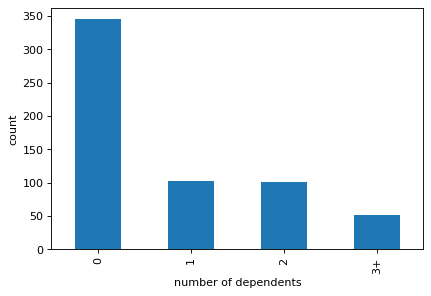

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
plt.xlabel("number of dependents")
plt.ylabel("count")
data['Dependents'].value_counts().head(100).plot.bar() # For categorical data
plt.show()

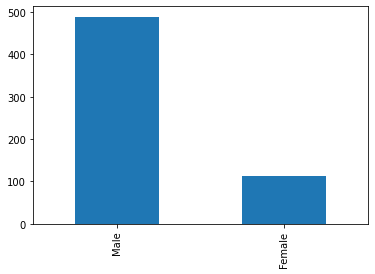

In [ ]:
data['Gender'].value_counts().head(100).plot.bar()
plt.show()

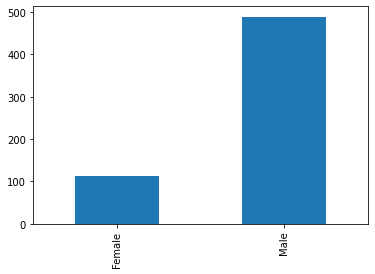

In [ ]:
data['Gender'].value_counts().sort_index().head(100).plot.bar()
plt.show()

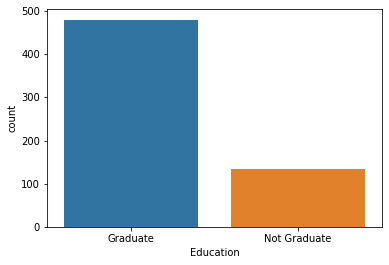

In [ ]:
sns.countplot(data['Education'])
plt.show()

### Pie Chart

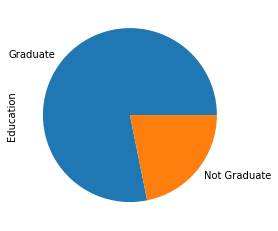

In [ ]:
data['Education'].value_counts().head(10).plot.pie()
plt.gca().set_aspect('equal')
plt.show()

## For numeric data

### Histogram

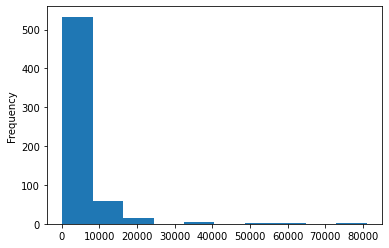

In [ ]:
data['ApplicantIncome'].plot.hist(bins=10) # For numeric data
plt.show()

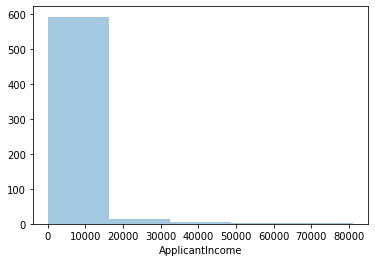

In [ ]:
sns.distplot(data['ApplicantIncome'].dropna(), bins=5, kde=False) # For numeric data
plt.show()

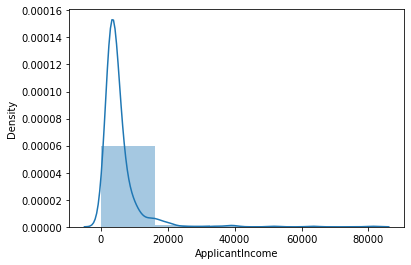

In [ ]:
sns.distplot(data['ApplicantIncome'].dropna(), bins=5, kde=True) # For numeric data
plt.show()

# What is kde?
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

### Line Plot

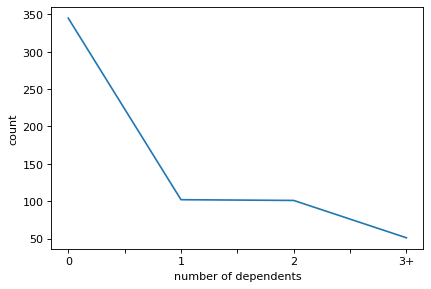

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
plt.xlabel("number of dependents")
plt.ylabel("count")
data['Dependents'].value_counts().head(100).plot.line() # For categorical data
plt.show()

### Kernel Density Estimate Plot 

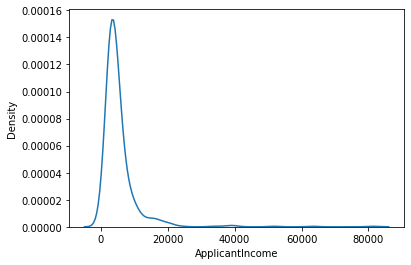

In [ ]:
sns.kdeplot(data['ApplicantIncome'].dropna()) #does smoothing
plt.show()

### Box Plots

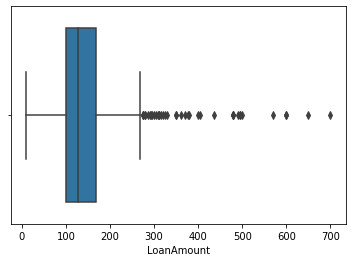

In [ ]:
sns.boxplot(data=data, x = 'LoanAmount')
plt.show()

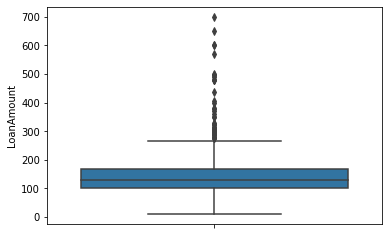

In [ ]:
sns.boxplot(data=data, y = 'LoanAmount')
plt.show()

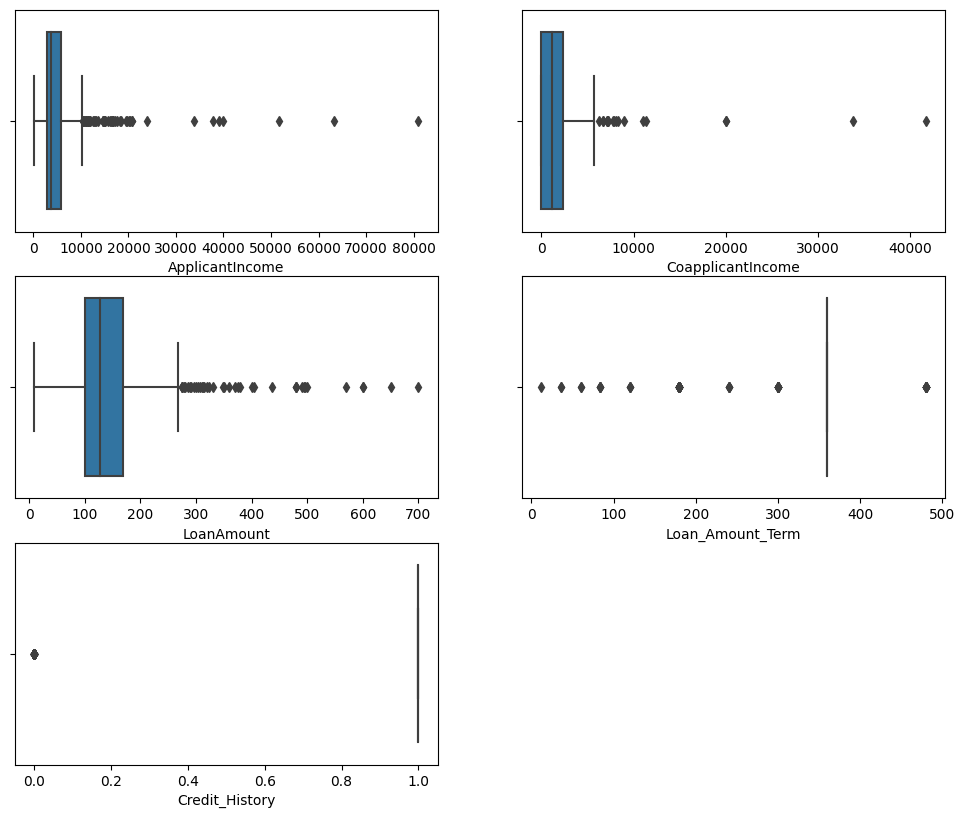

In [ ]:
plt.figure(figsize = (12, 10), dpi=100)
features = ["ApplicantIncome",	"CoapplicantIncome",	"LoanAmount",	"Loan_Amount_Term",	"Credit_History"]
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = data)
plt.show()

# Bi-variate Analysis

## Scatter Plot

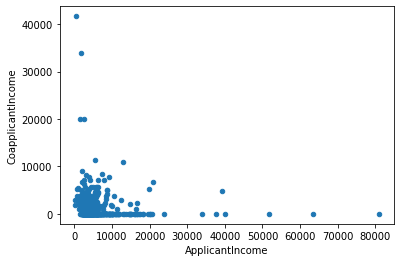

In [ ]:
data.plot.scatter(x='ApplicantIncome', y='CoapplicantIncome')
plt.show()

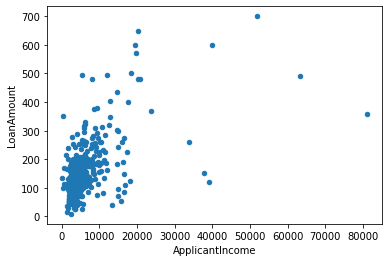

In [ ]:
data.plot.scatter(x='ApplicantIncome', y='LoanAmount')
plt.show()

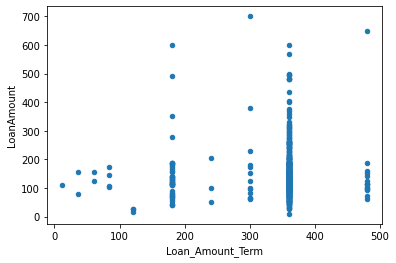

In [ ]:
data.plot.scatter(x='Loan_Amount_Term', y='LoanAmount')
plt.show()

## Line Plot

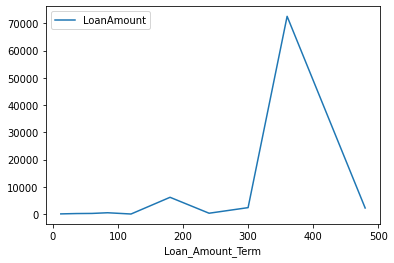

In [ ]:
data.groupby('Loan_Amount_Term')['LoanAmount'].sum().reset_index().plot.line(x='Loan_Amount_Term', y='LoanAmount')
plt.show()

## Kernel Density Estimate Plot

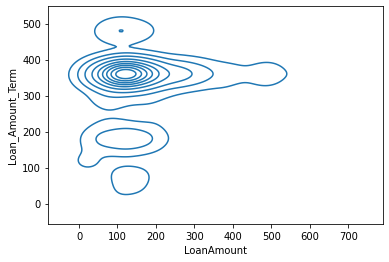

In [ ]:
sns.kdeplot(data['LoanAmount'],data['Loan_Amount_Term'])
plt.show()

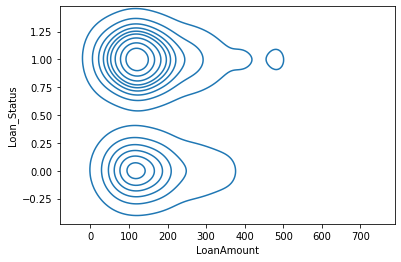

In [ ]:
sns.kdeplot(data['LoanAmount'],data['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0))
plt.show()

## Hexplot

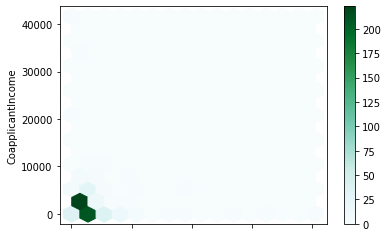

In [ ]:
data.plot.hexbin(x='ApplicantIncome', y='CoapplicantIncome', gridsize=15)
#A hexplot aggregates points in space into hexagons, and then colorize those hexagons
plt.show()

## Jointplot
Combining scatter and hexplot 

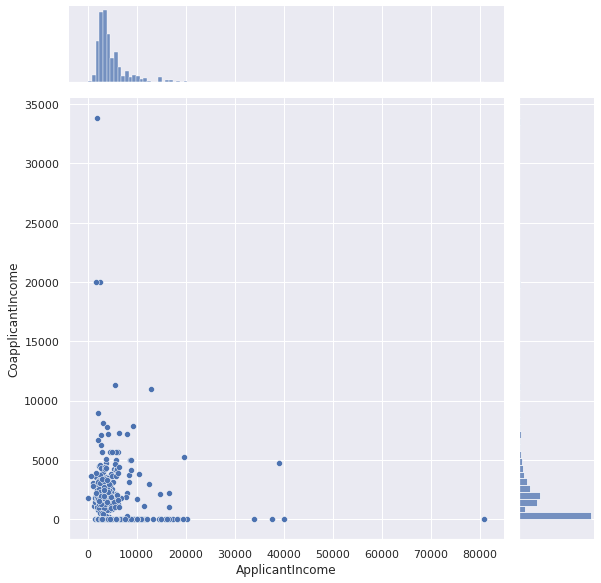

In [ ]:
sns.jointplot(x='ApplicantIncome', y='CoapplicantIncome', data=data.dropna(), height=8.27)
plt.show()

## Stacked Plots

In [ ]:
data_approve = data.groupby('Loan_Status').mean()[['ApplicantIncome', 'CoapplicantIncome']]

### Stacked Bar Plots

<Figure size 5760x3600 with 0 Axes>

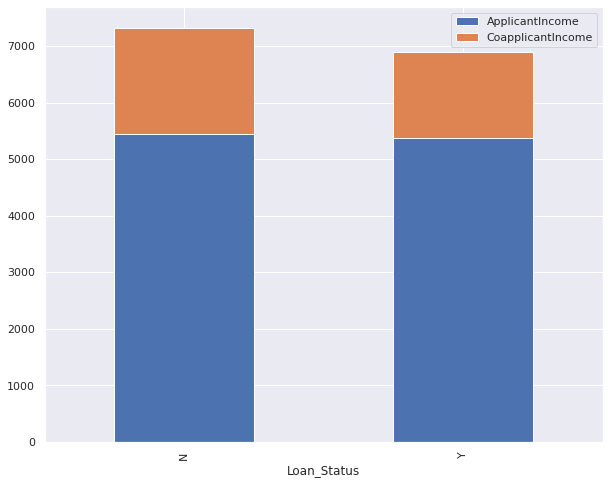

In [ ]:
plt.clf()
data_approve.plot.bar(stacked=True,figsize=(10, 8))
plt.show()

### Stacked Area Plots

<Figure size 5760x3600 with 0 Axes>

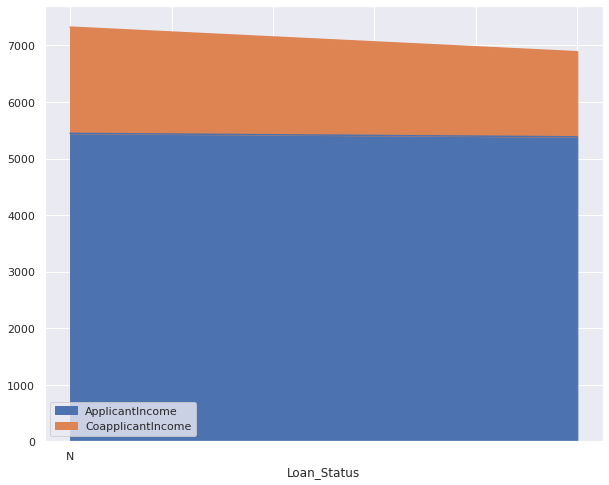

In [ ]:
plt.clf()
data_approve.plot.area(stacked=True,figsize=(10, 8))
plt.show()

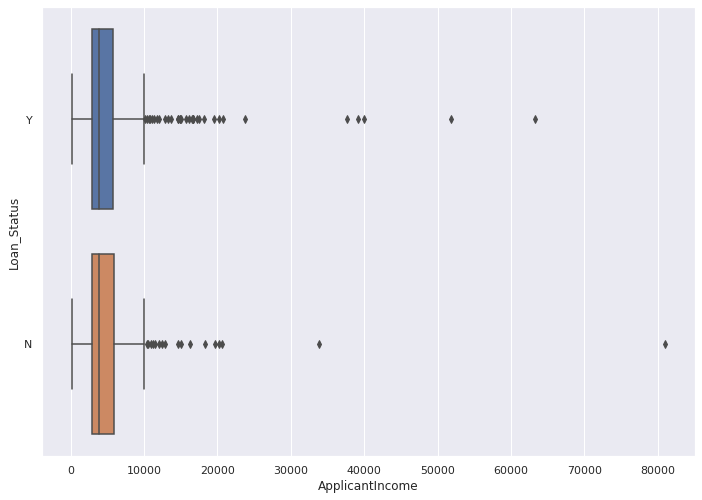

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.boxplot(x='ApplicantIncome', y='Loan_Status',data=data, ax=ax)
plt.show()

## Violin Plot

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.
Source: https://en.wikipedia.org/wiki/Violin_plot

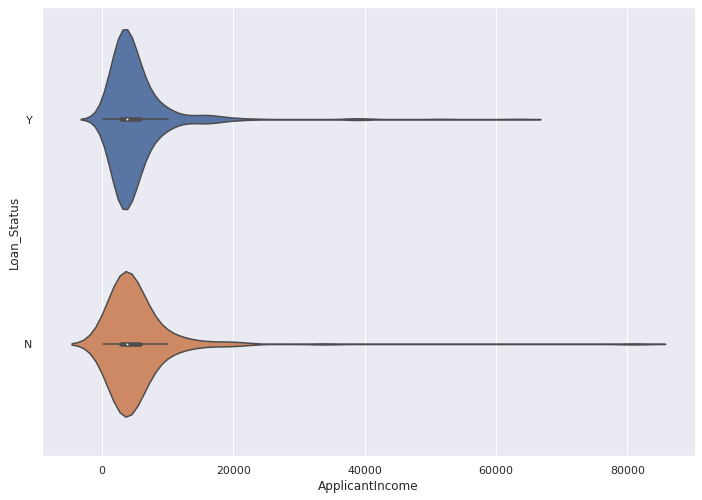

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.violinplot(x='ApplicantIncome', y='Loan_Status',data=data, ax=ax)
plt.show()

# Multi-variate Analysis

## Pairplots

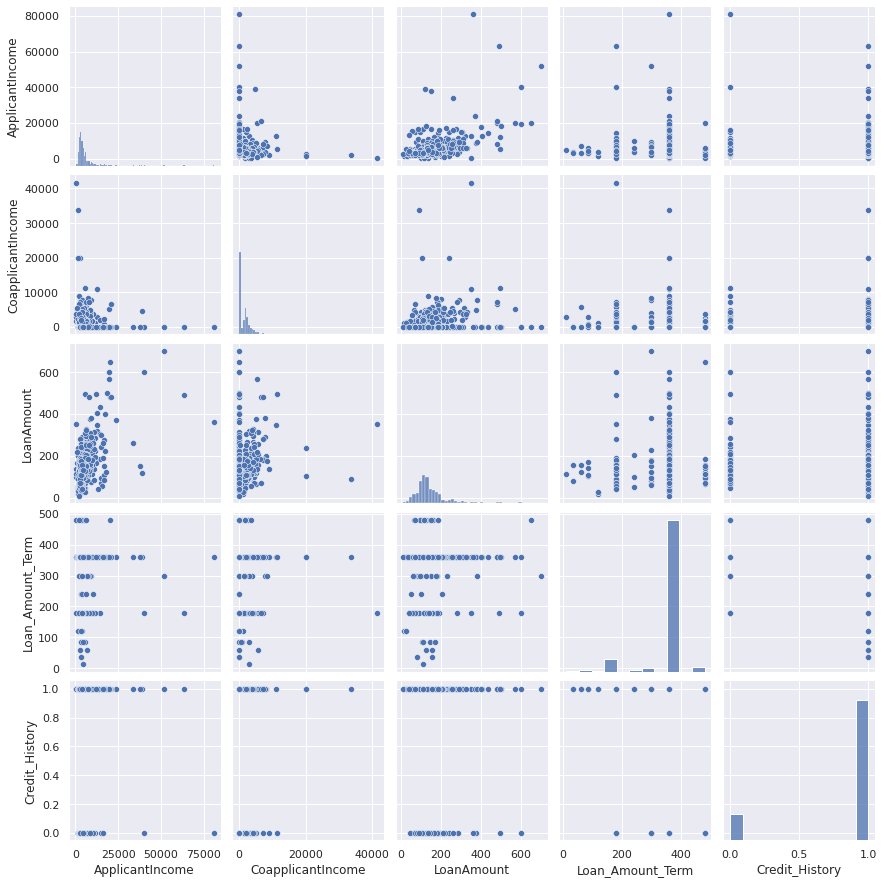

In [ ]:
sns.pairplot(data)
plt.show()

## Facet Grid
A FacetGrid is an object which stores some information on how you want to break up your data visualization.

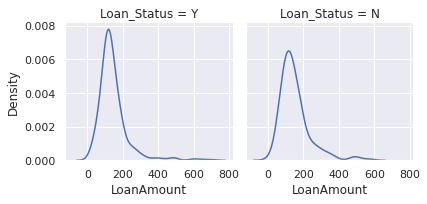

In [ ]:
g = sns.FacetGrid(data, col="Loan_Status")
g.map(sns.kdeplot, "LoanAmount")
plt.show()

## Scatter Plots

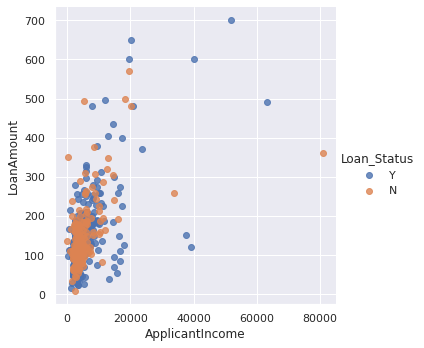

In [ ]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data, fit_reg=False)
plt.show()

## Heatmap / Correlation Plot

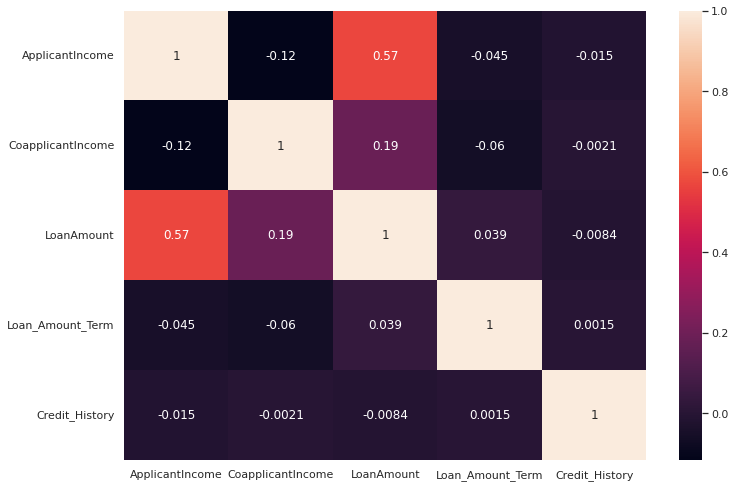

In [ ]:
features = ["ApplicantIncome",	"CoapplicantIncome",	"LoanAmount",	"Loan_Amount_Term",	"Credit_History"]
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(data[features].corr(),annot=True, ax=ax)
plt.show()

# Others

In [ ]:
features = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_app)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

In [ ]:
df = data['Dependents'].value_counts().reset_index()
sns.factorplot(x='date', y='count', hue='media', data=df, fit_reg=False)
plt.show()

In [ ]:
data.fillna(0).plot(x='Loan_Amount_Term', y= "LoanAmount",kind='line')
plt.show()

In [ ]:
# 3D plots: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html; #https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/

In [ ]:
# Model explainability plots

In [ ]:


#Adding color
train['Source_Category'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred')





#Adding font size and title
train['Source_Category'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred', fontsize=12, title='Source Category Distribution')



#Adding Title in bigger font
ax = train['Source_Category'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred', fontsize=12)
ax.set_title("Source Category Distribution", fontsize=20)


# ## Plotnine

# In[ ]:


#Link: https://www.kaggle.com/residentmario/grammer-of-graphics-with-plotnine-optional/
df = top_wines.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)


# ## Plotly



#Source: https://www.kaggle.com/residentmario/introduction-to-plotly-optional/
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = train.assign(n=0).groupby(['Primary_Bank_Type', 'Source_Category'])['n'].count().reset_index()
v = df.pivot(index='Primary_Bank_Type', columns='Source_Category', values='n').fillna(0).values.tolist()
iplot([go.Surface(z=v)])

In [ ]:
# References
# https://www.kaggle.com/santhraul/bank-loan-exploratory-data-analysis/notebook
# https://www.kaggle.com/ab9bhatia/complete-eda-for-loan-analysis/notebook
# https://colab.research.google.com/drive/1L_jr4FvHU4hvb52j6411aWC4P77ff4sd#scrollTo=t9Ngn3BebSmY